In [ ]:
!rm -rf /content/graph-edge-anomaly-detection/

In [ ]:
!git clone https://github.com/MKasaei00/graph-edge-anomaly-detection.git

Cloning into 'graph-edge-anomaly-detection'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 258 (delta 3), reused 12 (delta 2), pack-reused 235 (from 1)
Receiving objects: 100% (258/258), 60.56 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Updating files: 100% (53/53), done.


In [ ]:
!sudo apt-get install unrar  # Install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!pwd

/content


In [ ]:
!ls /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw.rar -ltrh

-rw-r--r-- 1 root root 3.3M Apr  6 20:03 /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw.rar


In [ ]:
# Extract the .rar file
!unrar x /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw.rar /content/graph-edge-anomaly-detection/datasets/ISCX/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw.rar

Creating    /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw  OK
Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/max values.txt      34%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/min values.txt      34%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/q1 values.txt      34%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/q2 values.txt      34%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/q3 values.txt      53%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/sum values.txt      99%  OK 
All OK


In [ ]:
import pandas as pd
import os

# Define the directory containing the .txt files
directory = '/content/graph-edge-anomaly-detection/datasets/ISCX/meta-raw/'

# Initialize a dictionary to store the DataFrames
dataframes = {}

# Loop through all files in the directoryn
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the file into a DataFrame
        df = pd.read_csv(file_path, delimiter='\t', header=None)  # Adjust delimiter if needed
        # Store the DataFrame in the dictionary
        dataframes[filename.replace('.txt', '')] = df

# Display the keys (file names) in the dictionary
print("Loaded DataFrames:", list(dataframes.keys()))

Loaded DataFrames: ['q2 values', 'min values', 'q3 values', 'sum values', 'max values', 'q1 values']


In [ ]:
dataframes['min values']

,0
0,0
1,0
2,0
3,0
4,0
...,...
1097065,0
1097066,0
1097067,0
1097068,0


In [ ]:
dataframes['q1 values']

,0
0,0
1,0
2,0
3,0
4,0
...,...
1097065,0
1097066,0
1097067,0
1097068,0


In [ ]:
dataframes['q2 values']

,0
0,0
1,0
2,0
3,0
4,0
...,...
1097065,0
1097066,0
1097067,0
1097068,0


In [ ]:
dataframes['q3 values']

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
1097065,5.077270e-258
1097066,4.569550e-258
1097067,4.112590e-258
1097068,3.701330e-258


In [ ]:
dataframes['max values']

,0
0,1.00000
1,1.00000
2,1.00000
3,1.00000
4,1.00000
...,...
1097065,6.51146
1097066,6.86031
1097067,7.17428
1097068,7.45685


In [ ]:
dataframes['sum values']

,0
0,1.0000
1,1.9000
2,2.7100
3,3.4390
4,4.4390
...,...
1097065,17.5591
1097066,16.8032
1097067,16.1229
1097068,15.5106


In [ ]:
import pandas as pd

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes.values(), axis=1)

# Set the column names to the original file names (without .txt)
merged_df.columns = dataframes.keys()

# Display the merged DataFrame
print(merged_df.head())

   q2 values  min values  q3 values  sum values  max values  q1 values
0          0           0        0.0       1.000         1.0          0
1          0           0        0.0       1.900         1.0          0
2          0           0        0.0       2.710         1.0          0
3          0           0        0.0       3.439         1.0          0
4          0           0        0.0       4.439         1.0          0


In [ ]:
merged_df

,q2 values,min values,q3 values,sum values,max values,q1 values
0,0,0,0.000000e+00,1.0000,1.00000,0
1,0,0,0.000000e+00,1.9000,1.00000,0
2,0,0,0.000000e+00,2.7100,1.00000,0
3,0,0,0.000000e+00,3.4390,1.00000,0
4,0,0,0.000000e+00,4.4390,1.00000,0
...,...,...,...,...,...,...
1097065,0,0,5.077270e-258,17.5591,6.51146,0
1097066,0,0,4.569550e-258,16.8032,6.86031,0
1097067,0,0,4.112590e-258,16.1229,7.17428,0
1097068,0,0,3.701330e-258,15.5106,7.45685,0


In [ ]:
!ls /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip

/content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip


In [ ]:
!rm -rf /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score
!unzip /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score.zip -d /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score

Archive:  /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score.zip
  inflating: /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score/anoedge_g_ISCX_score.csv  


In [ ]:
!ls /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score

anoedge_g_ISCX_score.csv


In [ ]:
file_path = '/content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score/anoedge_g_ISCX_score.csv'
scores_dataframe = pd.read_csv(file_path, sep=' ', header=None);
scores_dataframe.columns = ['Score', 'Label']
scores_dataframe

,Score,Label
0,1.0000,1
1,1.0000,0
2,1.0000,0
3,1.2226,0
4,1.5756,0
...,...,...
1097065,6.5115,0
1097066,6.8603,0
1097067,7.1743,0
1097068,7.4569,0


In [ ]:
merged = pd.concat([scores_dataframe,merged_df],axis=1)

In [ ]:
merged

,Score,Label,q2 values,min values,q3 values,sum values,max values,q1 values
0,1.0000,1,0,0,0.000000e+00,1.0000,1.00000,0
1,1.0000,0,0,0,0.000000e+00,1.9000,1.00000,0
2,1.0000,0,0,0,0.000000e+00,2.7100,1.00000,0
3,1.2226,0,0,0,0.000000e+00,3.4390,1.00000,0
4,1.5756,0,0,0,0.000000e+00,4.4390,1.00000,0
...,...,...,...,...,...,...,...,...
1097065,6.5115,0,0,0,5.077270e-258,17.5591,6.51146,0
1097066,6.8603,0,0,0,4.569550e-258,16.8032,6.86031,0
1097067,7.1743,0,0,0,4.112590e-258,16.1229,7.17428,0
1097068,7.4569,0,0,0,3.701330e-258,15.5106,7.45685,0


In [ ]:
# prompt: rename and reorder merged data frame to name : darpa summary
# score : first column
# label : second
# after that order like this
# min q1 median q3 max
# sum is the last column and rename it to sum

# Rename columns
merged = merged.rename(columns={
    'min values': 'min',
    'q1 values': 'q1',
    'q2 values': 'median',
    'q3 values': 'q3',
    'max values': 'max',
    'sum values': 'sum'
})

# Reorder columns
new_order = ['Score', 'Label', 'min', 'q1', 'median', 'q3', 'max', 'sum']
merged = merged[new_order]

# Rename the DataFrame
merged_df = merged
merged_df = merged_df.rename(index=str, columns={"Score": "score", "Label": "label"})

# Display the updated DataFrame
print(merged_df.head())
merged_df


    score  label  min  q1  median   q3  max    sum
0  1.0000      1    0   0       0  0.0  1.0  1.000
1  1.0000      0    0   0       0  0.0  1.0  1.900
2  1.0000      0    0   0       0  0.0  1.0  2.710
3  1.2226      0    0   0       0  0.0  1.0  3.439
4  1.5756      0    0   0       0  0.0  1.0  4.439


,score,label,min,q1,median,q3,max,sum
0,1.0000,1,0,0,0,0.000000e+00,1.00000,1.0000
1,1.0000,0,0,0,0,0.000000e+00,1.00000,1.9000
2,1.0000,0,0,0,0,0.000000e+00,1.00000,2.7100
3,1.2226,0,0,0,0,0.000000e+00,1.00000,3.4390
4,1.5756,0,0,0,0,0.000000e+00,1.00000,4.4390
...,...,...,...,...,...,...,...,...
1097065,6.5115,0,0,0,0,5.077270e-258,6.51146,17.5591
1097066,6.8603,0,0,0,0,4.569550e-258,6.86031,16.8032
1097067,7.1743,0,0,0,0,4.112590e-258,7.17428,16.1229
1097068,7.4569,0,0,0,0,3.701330e-258,7.45685,15.5106


In [ ]:
merged_df.dtypes

,0
score,float64
label,int64
min,int64
q1,int64
median,int64
q3,float64
max,float64
sum,float64


In [ ]:
# prompt: Convert all the values except the score to int64

# Convert columns to int64, excluding 'score' and 'label'
for col in merged_df.columns:
    if col not in ['score', 'label']:
        merged_df[col] = merged_df[col].astype('int64')

# Display data types to verify
merged_df.dtypes


,0
score,float64
label,int64
min,int64
q1,int64
median,int64
q3,int64
max,int64
sum,int64


In [ ]:
merged_df

,score,label,min,q1,median,q3,max,sum
0,1.0000,1,0,0,0,0,1,1
1,1.0000,0,0,0,0,0,1,1
2,1.0000,0,0,0,0,0,1,2
3,1.2226,0,0,0,0,0,1,3
4,1.5756,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...
1097065,6.5115,0,0,0,0,0,6,17
1097066,6.8603,0,0,0,0,0,6,16
1097067,7.1743,0,0,0,0,0,7,16
1097068,7.4569,0,0,0,0,0,7,15


In [ ]:
# prompt: write merged_df into a csv file

# Save the DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [ ]:
import zipfile

# Zip the CSV file
with zipfile.ZipFile('merged_data.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('merged_data.csv')

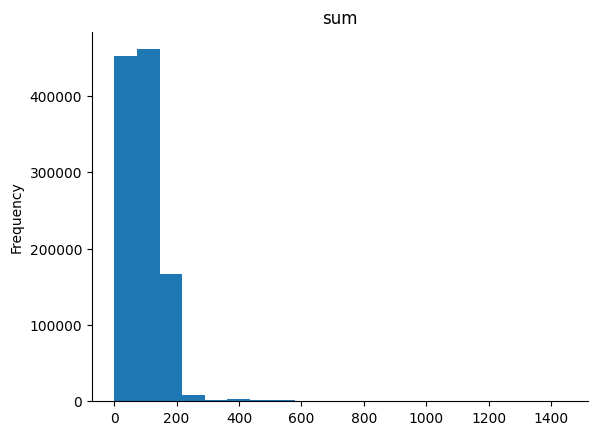

In [ ]:
from matplotlib import pyplot as plt
merged_df['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

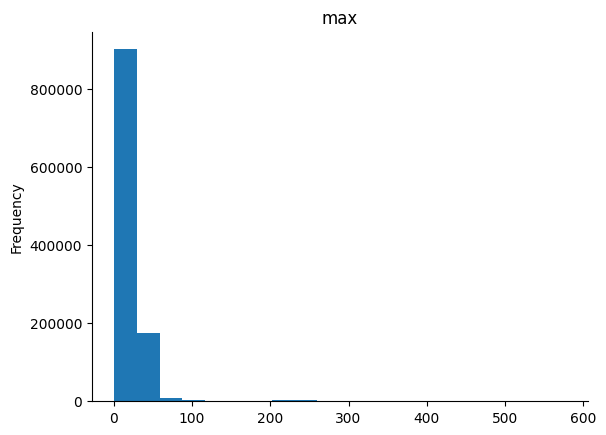

In [ ]:
from matplotlib import pyplot as plt
merged_df['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

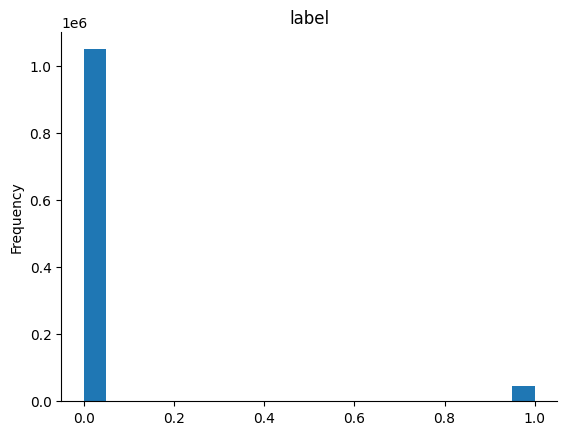

In [ ]:
from matplotlib import pyplot as plt
merged_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

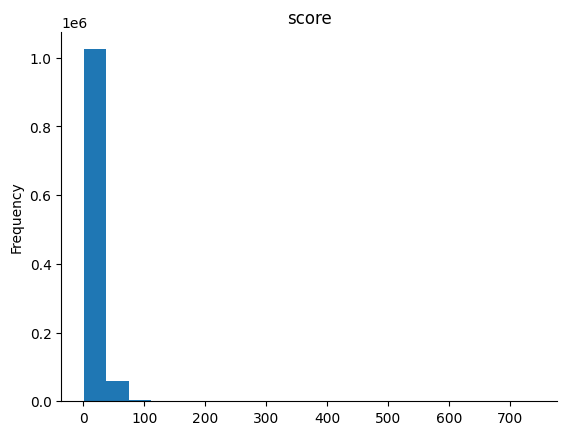

In [ ]:
from matplotlib import pyplot as plt
merged_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

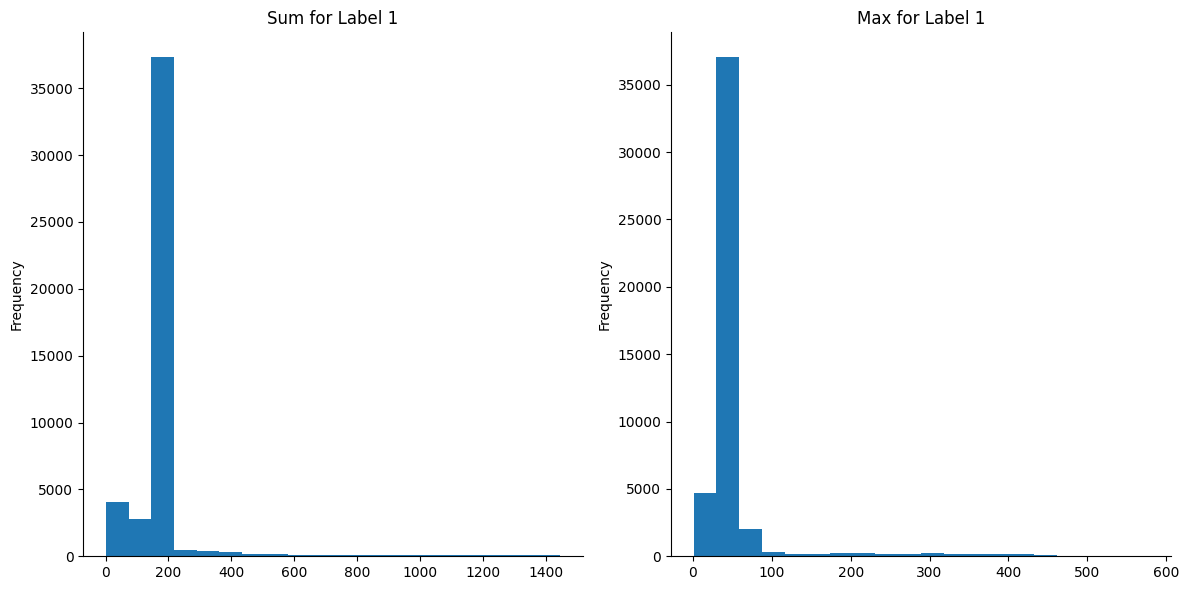

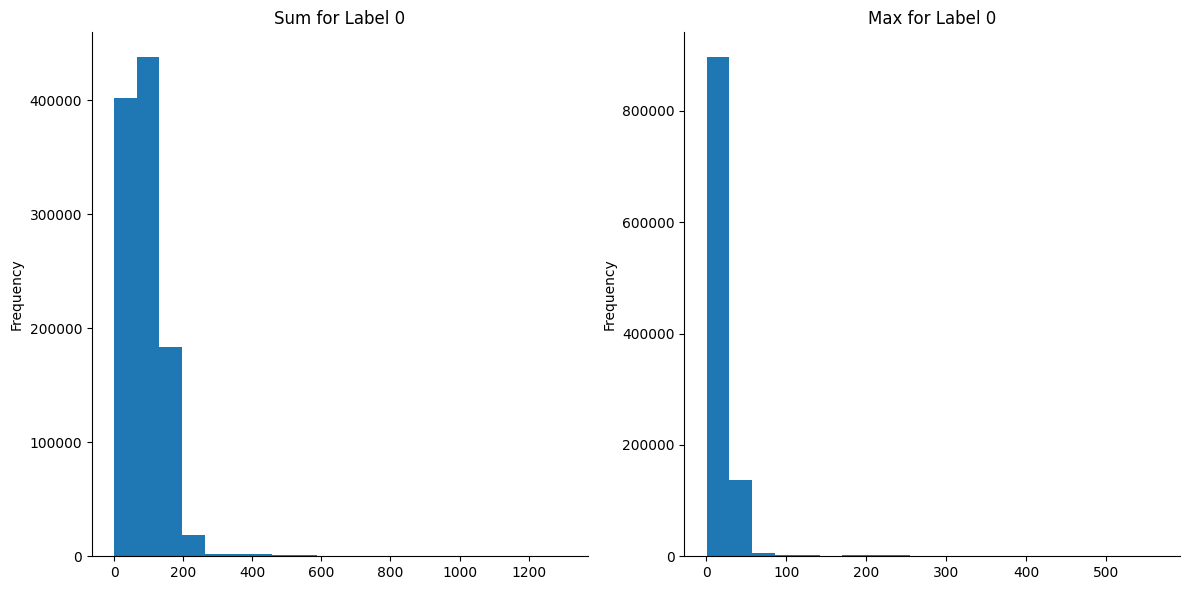

In [ ]:
# prompt: draw sum and max plot group by label values
# it means for zero and one labels draw separate diagrams
# in total I need 4 diagrams

import matplotlib.pyplot as plt

# Assuming merged_df is already defined and processed as in the provided code

for label in merged_df['label'].unique():
    subset = merged_df[merged_df['label'] == label]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    subset['sum'].plot(kind='hist', bins=20, title=f'Sum for Label {label}')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.subplot(1, 2, 2)
    subset['max'].plot(kind='hist', bins=20, title=f'Max for Label {label}')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()
